# Read initial model and plot velocity in horizontal section

In [4]:
from pytomoatt.model import ATTModel
import numpy as np
# initial model hdf5 file
initial_model_file = '../0_generate_files_for_TomoATT/2_models/model_init_N61_61_61.h5'
# input parameters file
par_file = 'input_params/input_params_inv_abs.yaml'

# read model file by pytomoatt
model = ATTModel.read(initial_model_file, par_file)
initial_model = model.to_xarray()

# we can access the velocity at arbitrary depth
all_depth = [10.0,30.0]
all_vel = []
for i in range(len(all_depth)):
    depth = all_depth[i]
    tmp = initial_model.interp_dep(depth, field='vel')
    print("The shape of initial model array is ", tmp.shape)
    lon = tmp[:,0]
    lat = tmp[:,1]
    vel = tmp[:,2]
    all_vel.append(vel)

# we can also access the velocity at arbitrary vertical profile
all_start = [
    [30.0, 30.5],
    [30.5, 30.0],
]
all_end = [
    [32.0, 30.5],
    [30.5, 32.0],
]

sec_lon = []
sec_lat = []
sec_dis = []
sec_dep = []
sec_vel = []
for i in range(len(all_start)):
    start = all_start[i]
    end = all_end[i]
    tmp = initial_model.interp_sec(start, end, field='vel', val = 1)
    print("The shape of initial model array is ", tmp.shape)
    sec_lon.append(tmp[:,0])
    sec_lat.append(tmp[:,1])
    sec_dis.append(tmp[:,2])
    sec_dep.append(tmp[:,3])
    sec_vel.append(tmp[:,4])

The shape of initial model array is  (3721, 3)
The shape of initial model array is  (3721, 3)
The shape of initial model array is  (11712, 5)
The shape of initial model array is  (13542, 5)


d:\my_software\python\lib\site-packages\pyproj\geod.py:827: UserWarning: Back azimuth is being returned by default to be compatible with inv()This is a breaking change for pyproj 3.5+.To avoid this warning, set return_back_azimuth=True.Otherwise, to restore old behaviour, set return_back_azimuth=False.This warning will be removed in future version.
  warnings.warn(


# Pygmt plot

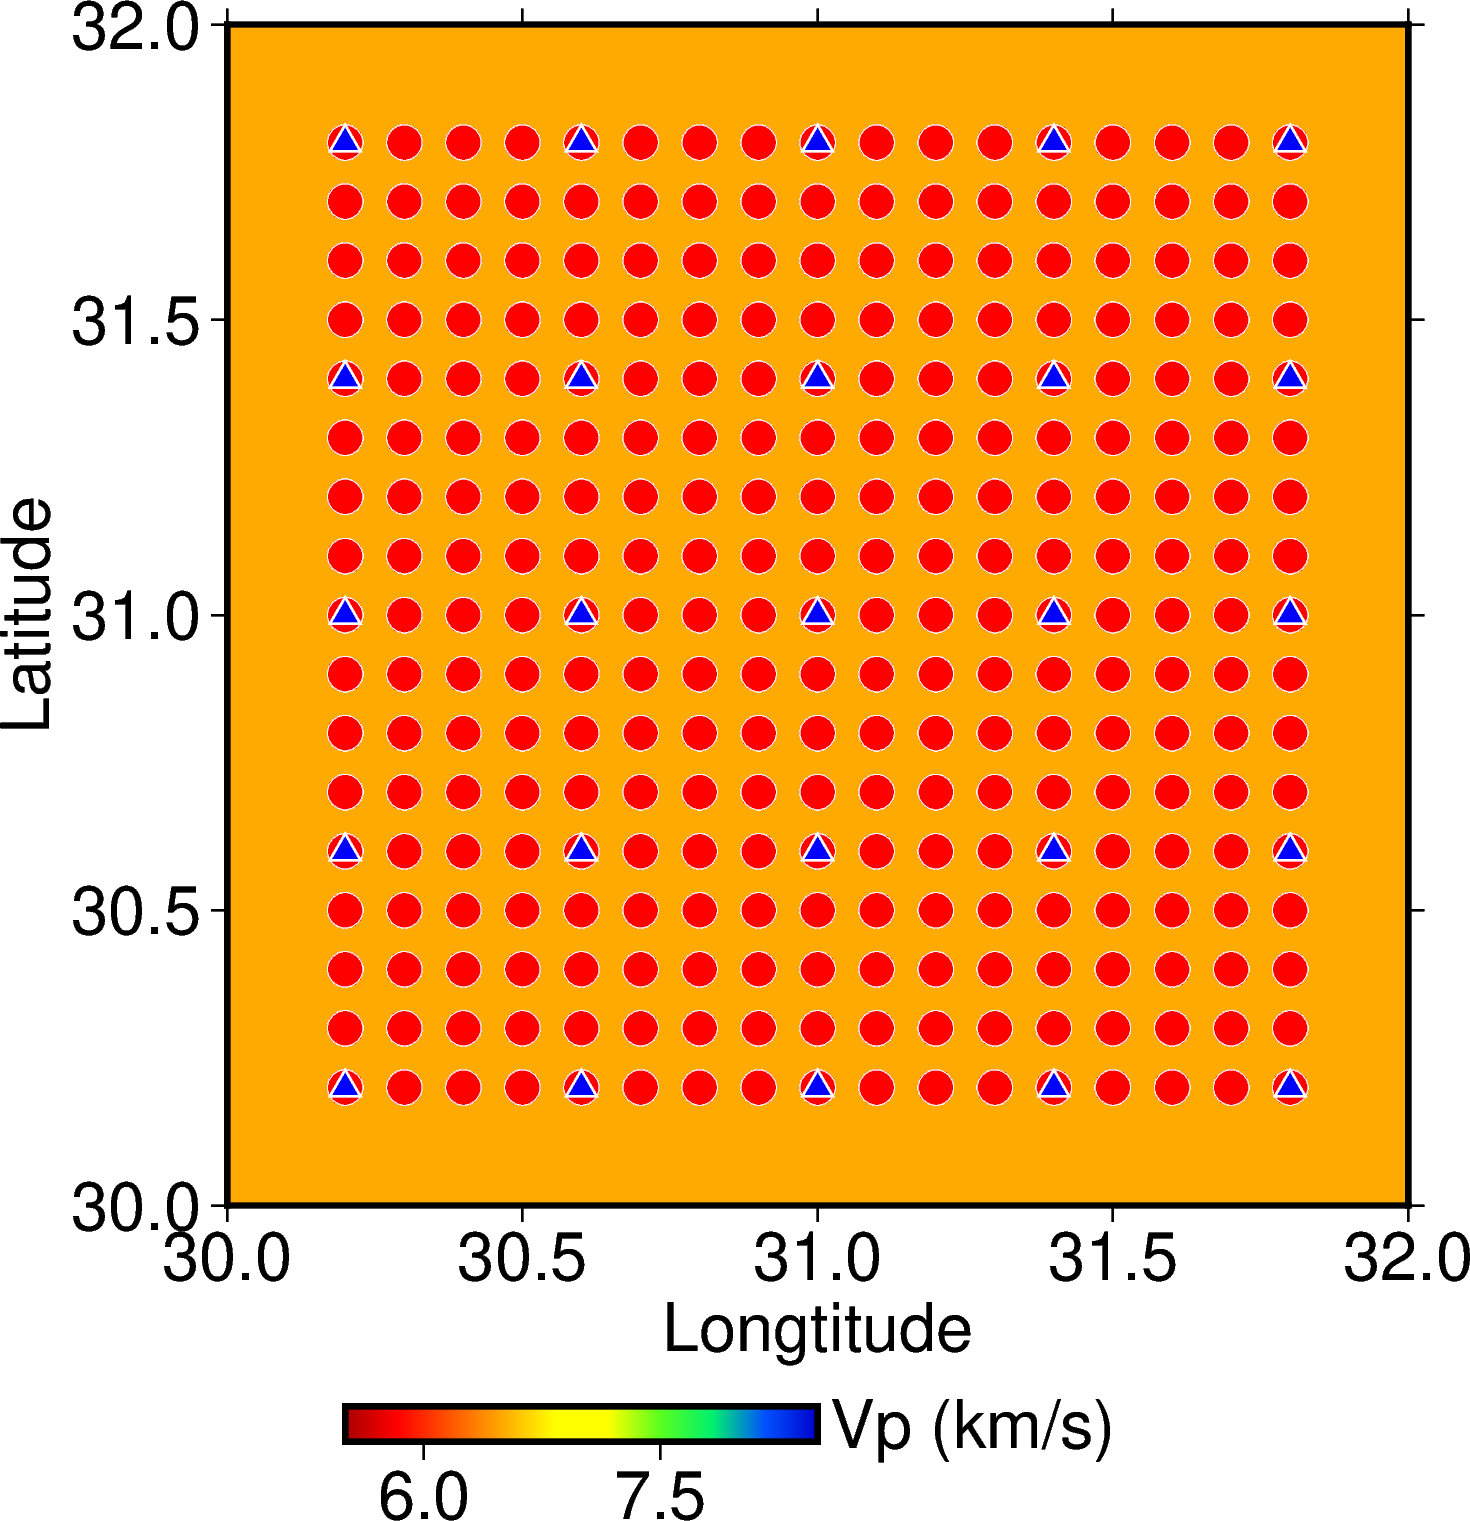

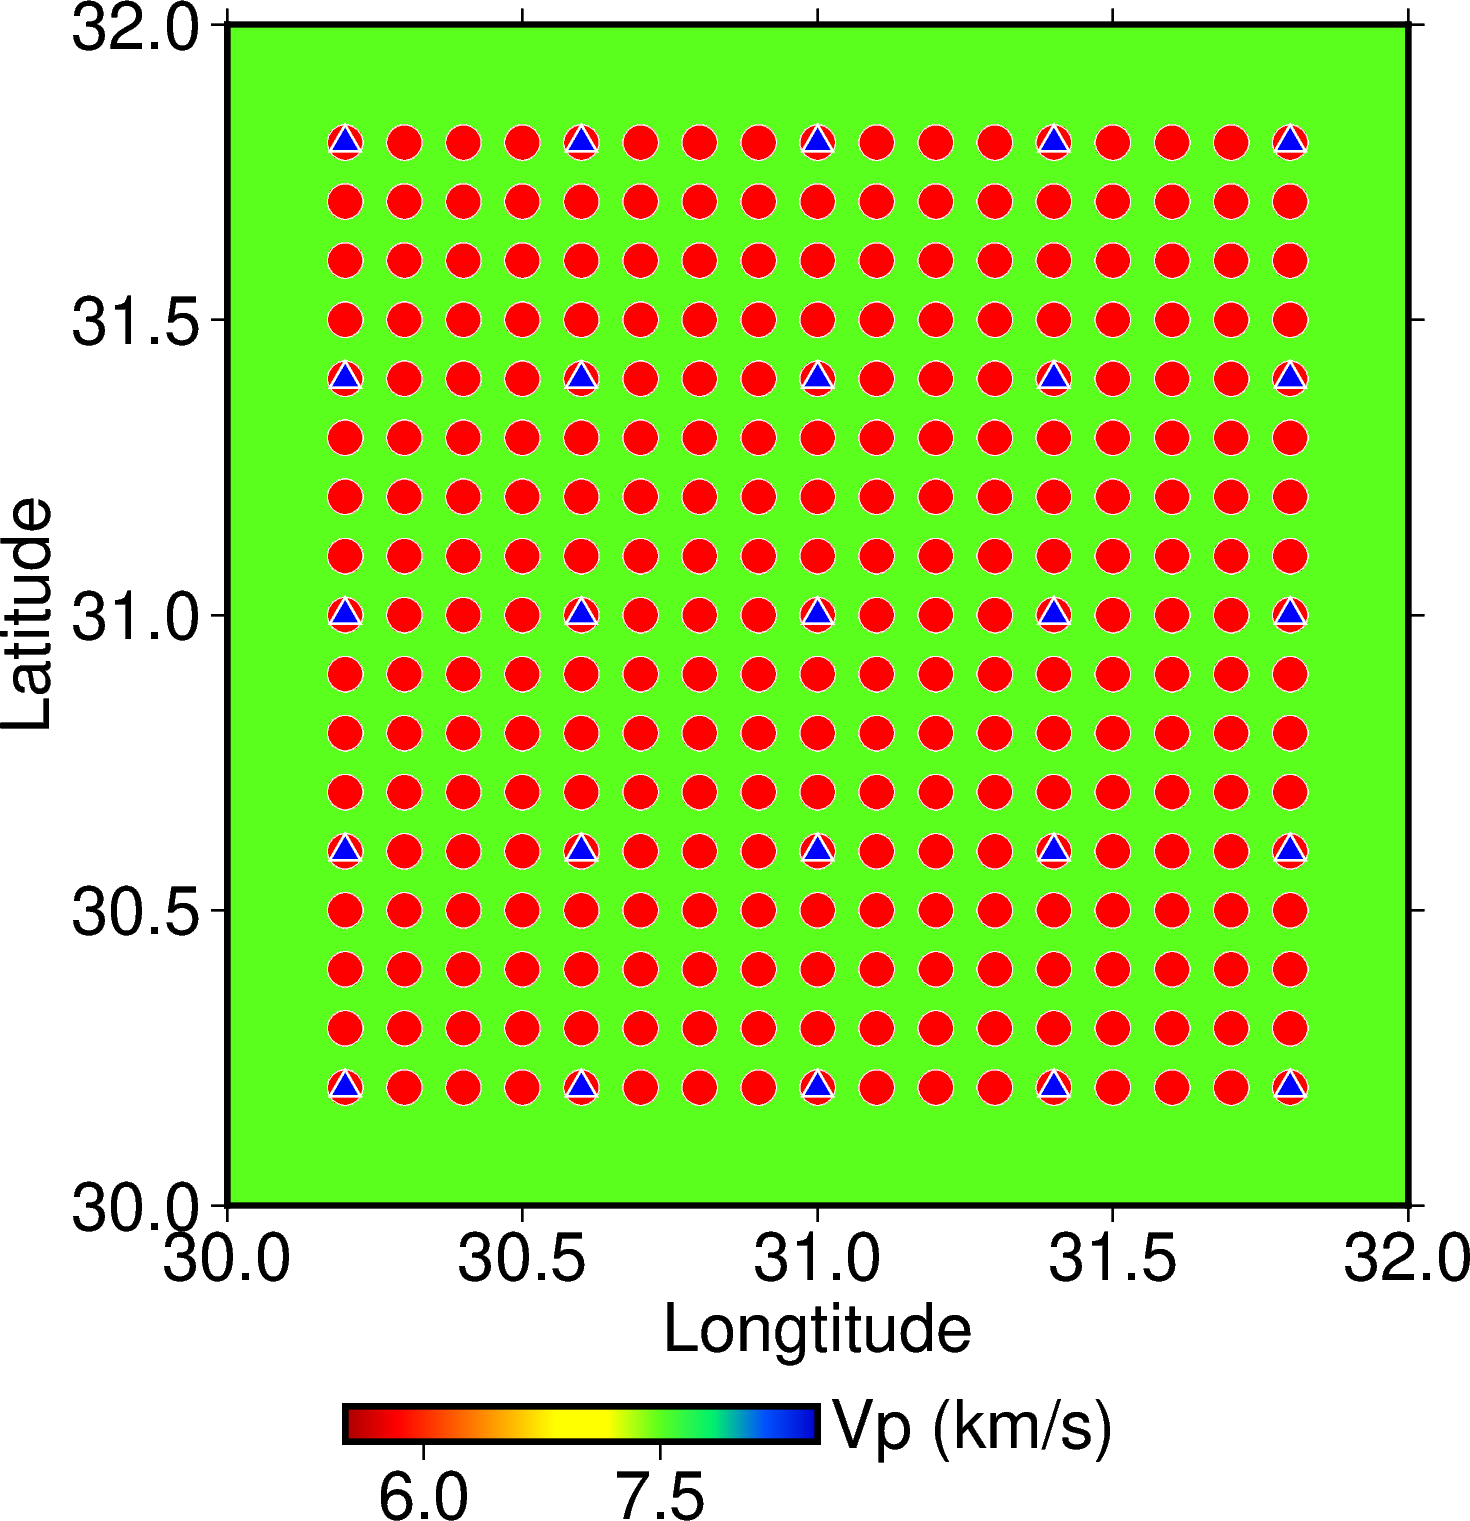

In [5]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map

import functions_for_data as tools

# read src rec file
ev, st = tools.read_src_rec_file('../0_generate_files_for_TomoATT/1_src_rec_files/src_rec_config.dat')
[lon_ev,lat_ev,dep_ev,wt_ev] = tools.data_lon_lat_dep_wt_ev(ev)
[lon_st,lat_st,ele_st,wt_st] = tools.data_lon_lat_ele_wt_st(ev,st)
station = np.vstack([lon_st,lat_st])
earthquake = np.vstack([lon_ev,lat_ev])

dx = 0.1; dy = 0.1
for i in range(len(all_depth)):
    vel = all_vel[i]
    fname = 'img/1a_initial_model_depth_'+str(all_depth[i])+'.png'
    fig = plot_map(lon,lat,vel,dx,dy,
                fname       = fname, 
                station     = station,
                earthquake  = earthquake,
                axis_label  = ["Longtitude","Latitude"],
                colorbar    = "Vp (km/s)", 
                cpt_range   = [5.5,8.5])

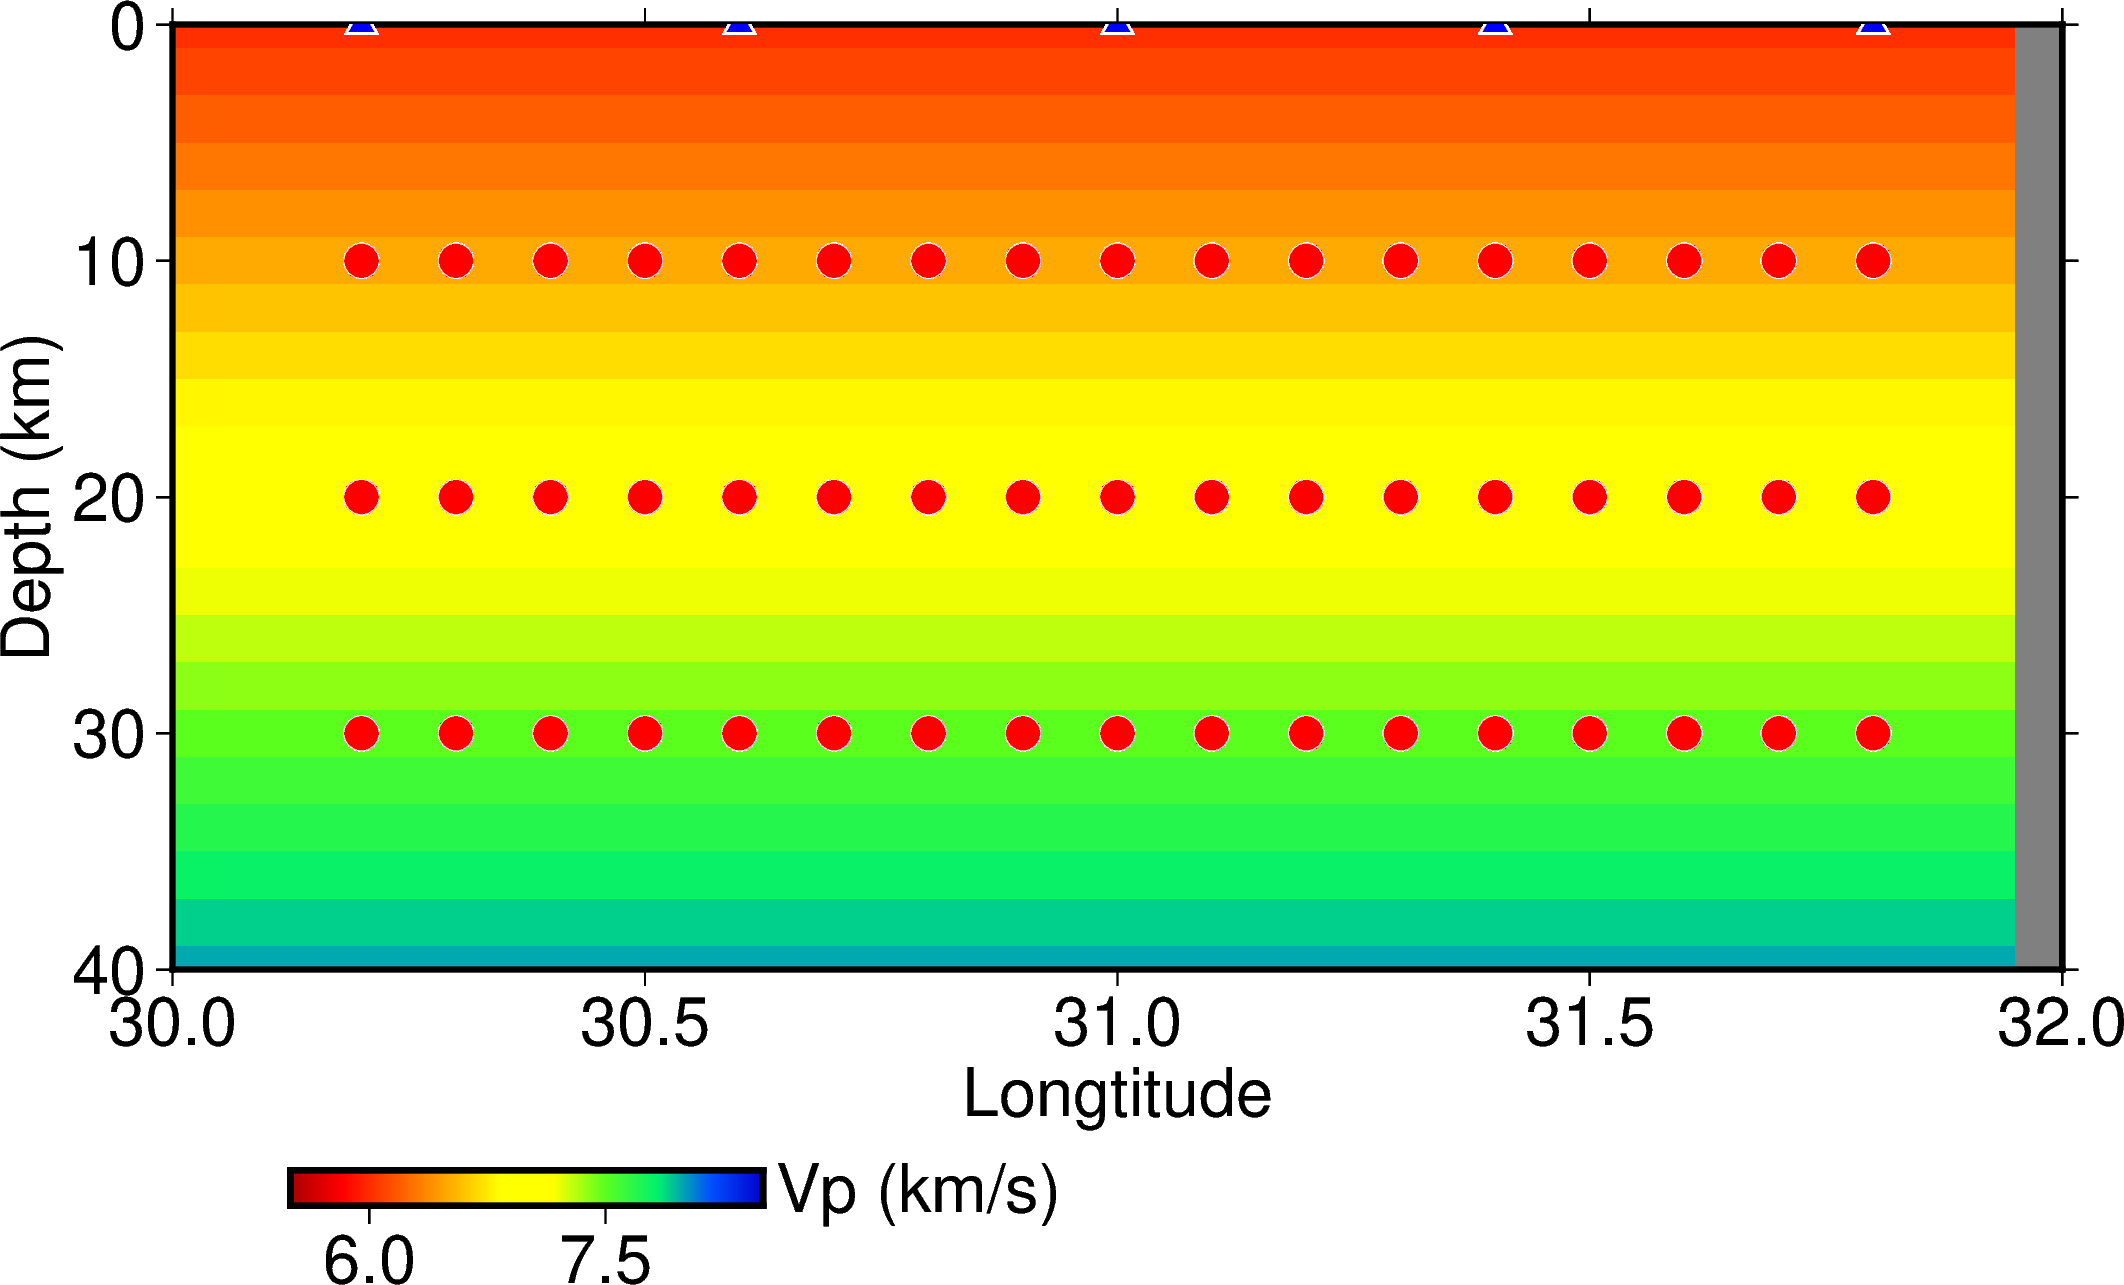

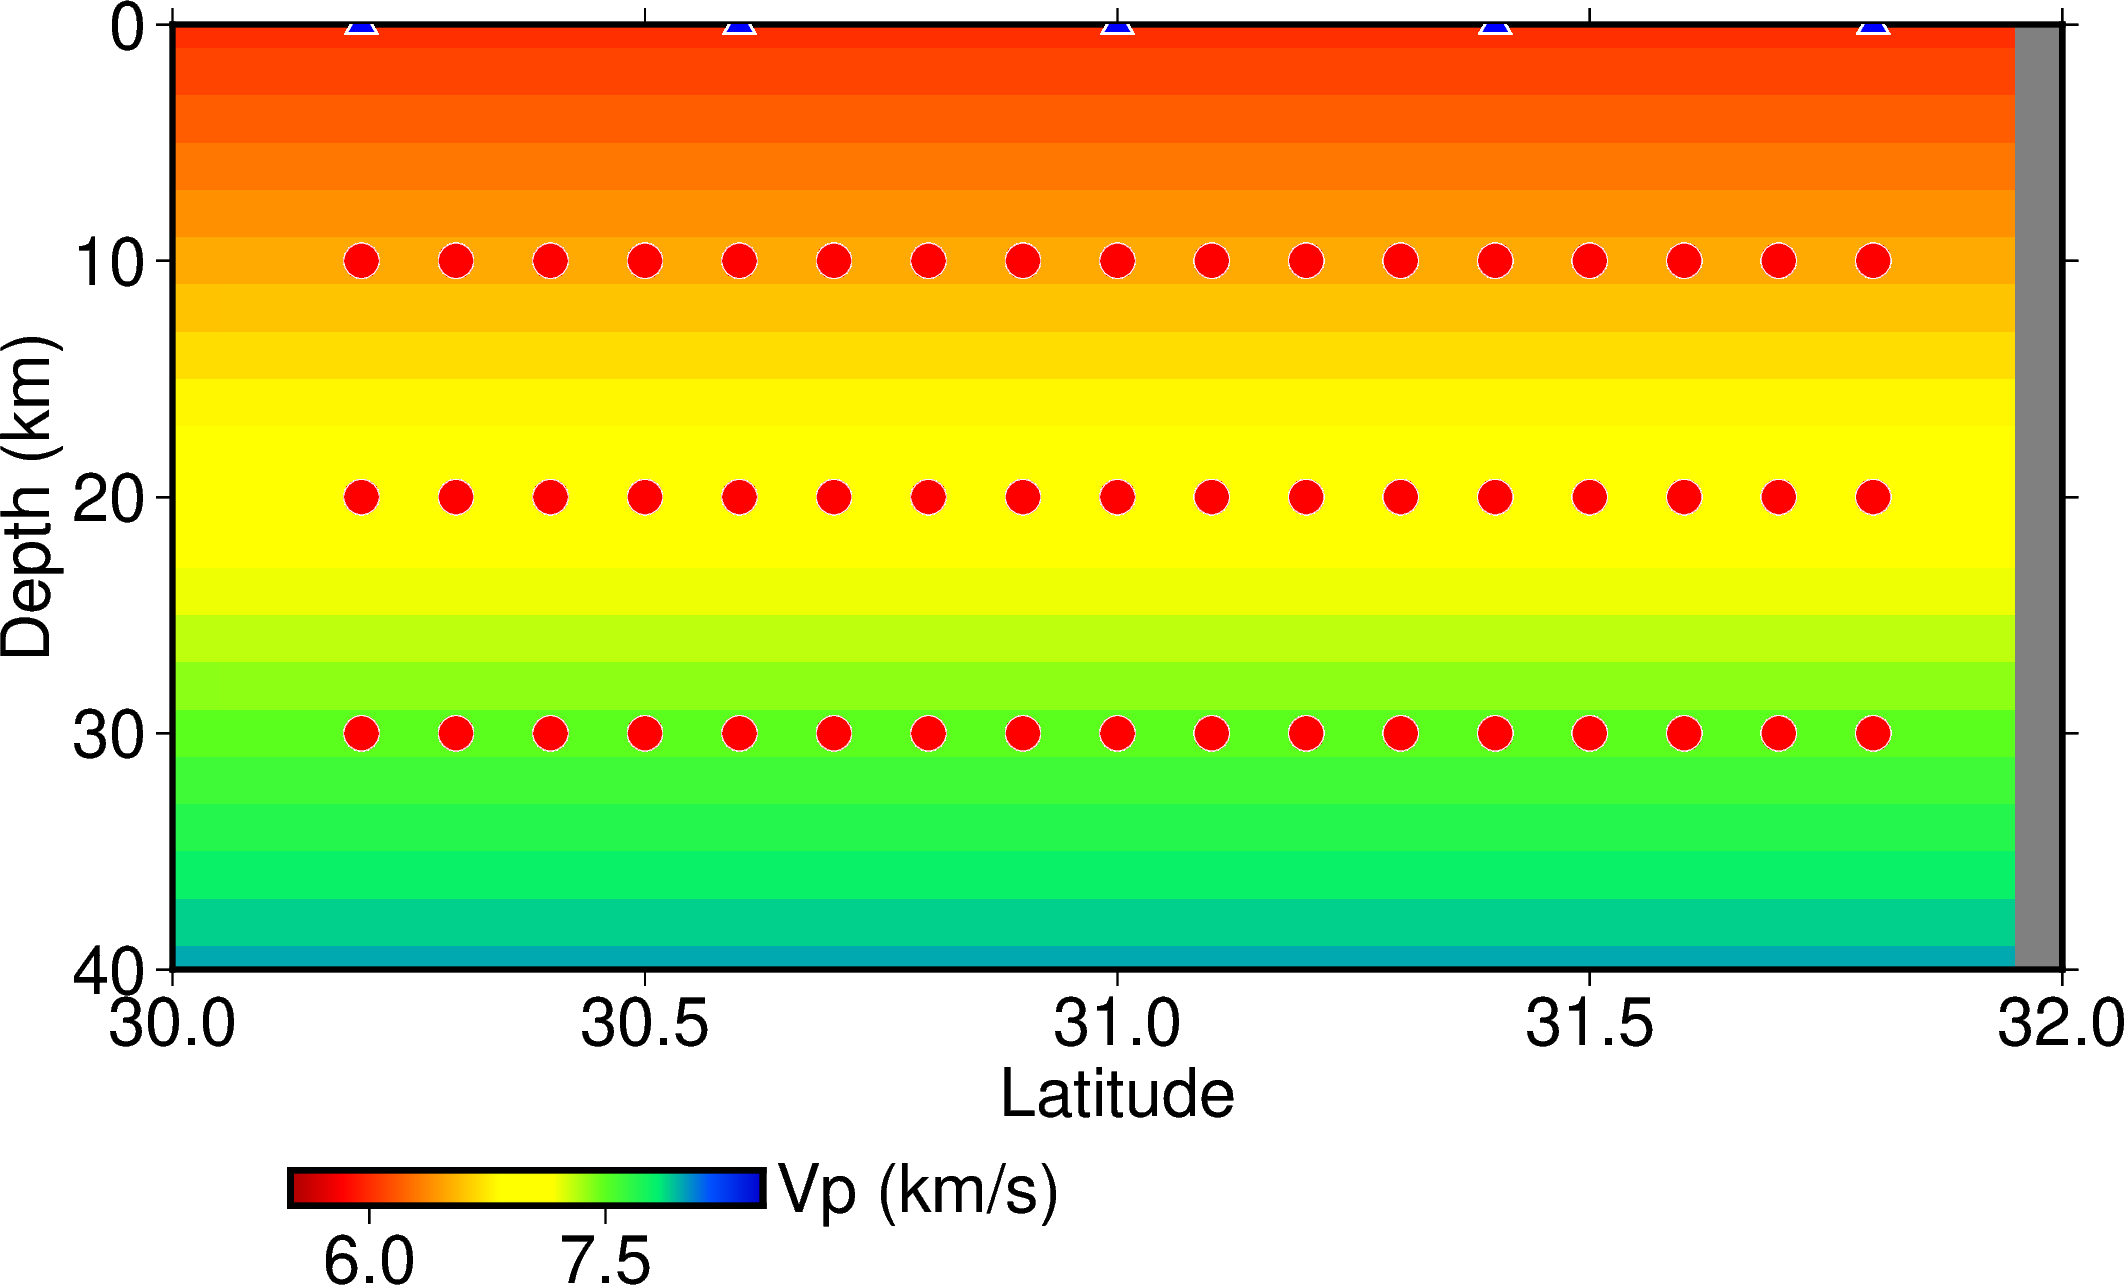

In [6]:

dx = 0.1; dy = 2
lon = sec_lon[0]
dep = sec_dep[0]
vel = sec_vel[0]
station = np.vstack([lon_st,-ele_st/1000])
earthquake = np.vstack([lon_ev,dep_ev])
fname = 'img/1a_initial_model_profile_1.png'
fig = plot_map(lon,dep,vel,dx,dy,
            fname       = fname, 
            station     = station,
            earthquake  = earthquake,
            region      = [30.0,32.0,0,40],
            fig_size    = [16, 8],
            axis_label  = ["Longtitude","Depth (km)"],
            colorbar    = "Vp (km/s)", 
            cpt_range   = [5.5,8.5],
            y_reverse   = True)

lat = sec_lat[1]
dep = sec_dep[1]
vel = sec_vel[1]
station = np.vstack([lat_st,-ele_st/1000])
earthquake = np.vstack([lat_ev,dep_ev])
fname = 'img/1a_initial_model_profile_2.png'
fig = plot_map(lat,dep,vel,dx,dy,
            fname       = fname, 
            station     = station,
            earthquake  = earthquake,
            region      = [30.0,32.0,0,40],
            fig_size    = [16, 8],
            axis_label  = ["Latitude","Depth (km)"],
            colorbar    = "Vp (km/s)", 
            cpt_range   = [5.5,8.5],
            y_reverse   = True)